#  Machine Learning Model Evaluation and Comparison

##  Objective
This notebook aims to compare the performance of multiple classification models, including **KNN, SVM, Decision Tree, and Random Forest**. We will evaluate each model based on **accuracy, classification reports, confusion matrices, and ROC curves**.

---

##  **1. Import Required Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## 🔹 **2.Load and Preprocess the Dataset**

In [2]:
# Load dataset
train_data = pd.read_csv("train.csv")

data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data[['Age', 'Embarked']] = imputer.fit_transform(data[['Age', 'Embarked']])

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['Sex', 'Embarked']
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_features)], remainder='passthrough')

# Define Features and Target
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(preprocessor.fit_transform(X_train))
X_test_scaled = scaler.transform(preprocessor.transform(X_test))


##  **3.Initialize and Train Multiple Models**
##  Model Definitions  

We define multiple machine learning models to compare their performance in predicting wine quality. Each model is initialized with specific hyperparameters:  

- **K-Nearest Neighbors (KNN)**:  
  - Uses **7 neighbors** (`n_neighbors=7`) to classify a sample based on the majority vote of its nearest neighbors.  

- **Support Vector Machine (SVM)**:  
  - Uses the **Radial Basis Function (RBF) kernel** (`kernel='rbf'`) for non-linear classification.  
  - The **regularization parameter (C=1)** controls the trade-off between achieving a low error rate and maintaining a simple model.  
  - `probability=True` allows probability estimates for classification.  

- **Decision Tree**:  
  - A tree-based model with a **maximum depth of 10** (`max_depth=10`) to prevent overfitting.  
  - A **minimum of 5 samples** (`min_samples_split=5`) is required to split an internal node, ensuring meaningful splits.  

- **Random Forest**:  
  - An ensemble model composed of **100 decision trees** (`n_estimators=100`).  
  - Each tree has a **maximum depth of 10** (`max_depth=10`), balancing complexity and generalization.  


In [3]:
# Define Models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(probability=True, C=1, kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10)
}

##  **4. Model Evaluation and Performance Metrics**
##  Model Evaluation with Confusion Matrix  

###  Understanding the Confusion Matrix  
A **confusion matrix** provides a performance summary of a classification model by displaying the counts of true and false predictions for each class. It is structured as follows:  

| Actual \ Predicted | Predicted: Negative (0) | Predicted: Positive (1) |
|-------------------|----------------------|----------------------|
| **Actual: Negative (0)** | True Negative (TN)  | False Positive (FP)  |
| **Actual: Positive (1)** | False Negative (FN)  | True Positive (TP)  |

- **True Negative (TN)**: Correctly predicted negative instances.  
- **False Positive (FP)**: Incorrectly predicted positive instances (Type I Error).  
- **False Negative (FN)**: Incorrectly predicted negative instances (Type II Error).  
- **True Positive (TP)**: Correctly predicted positive instances.  

###  Model: K-Nearest Neighbors (KNN)  

####  Performance Metrics:
- **Accuracy**: `79.3%` → Measures the overall correctness of the model.  
- **Precision**: Measures how many of the predicted positive cases were actually positive.  
  - Class 0 (Not Survived): `81%`  
  - Class 1 (Survived): `76%`  
- **Recall (Sensitivity)**: Measures how well the model captures actual positive cases.  
  - Class 0: `84%`  
  - Class 1: `73%`  
- **F1-Score**: The harmonic mean of precision and recall, balancing false positives and false negatives.  

#### 🔹 Confusion Matrix for KNN:
- **True Negatives (TN)** = `88`
- **False Positives (FP)** = `17`
- **False Negatives (FN)** = `20`
- **True Positives (TP)** = `54`

###  Interpretation:  
- The model correctly classified **88** non-survivors and **54** survivors.  
- **17 survivors were misclassified** as non-survivors (False Positives).  
- **20 actual survivors were missed** by the model (False Negatives).  
- A relatively balanced performance, but improvements could be made in recall for the "Survived" class.  




Model: KNN
Accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:


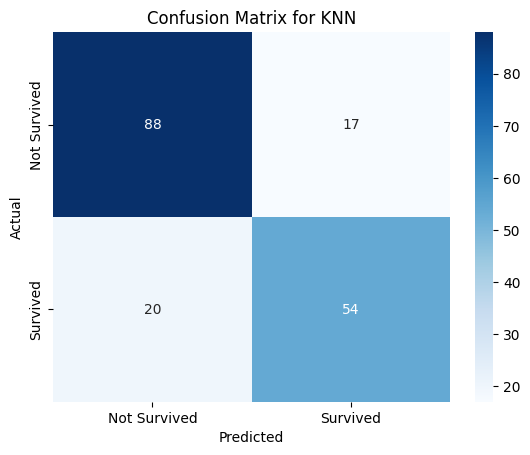

---------------------------------------------
Model: SVM
Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:


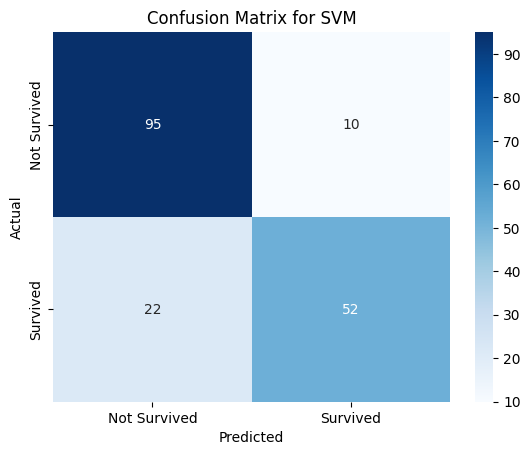

---------------------------------------------
Model: Decision Tree
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix:


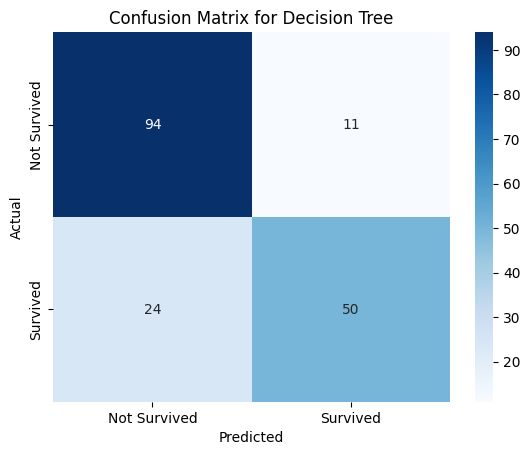

---------------------------------------------
Model: Random Forest
Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:


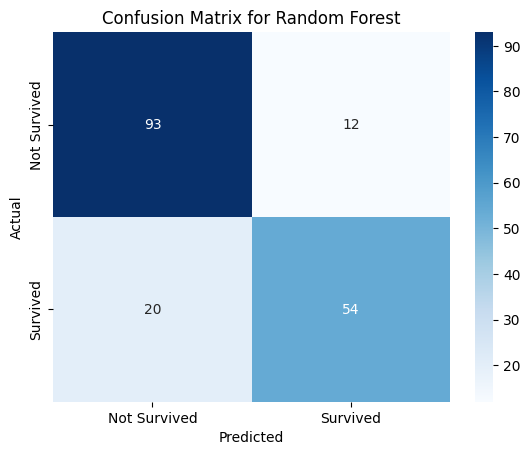

---------------------------------------------


In [4]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    print("---------------------------------------------")

## 🔹 **5. Hyperparameter Tuning Using RandomizedSearchCV**
#  Parameter Tuning and Model Optimization

##  1. Parameters for Fine-Tuning Each Algorithm
Each machine learning model has hyperparameters that can be adjusted to improve performance. Below are some key parameters for fine-tuning:

### **K-Nearest Neighbors (KNN)**
- `n_neighbors`: Number of nearest neighbors to consider (e.g., 3, 5, 7, 9).
- `weights`: `uniform` (equal weighting) or `distance` (closer points have more influence).
- `metric`: Distance metric such as `euclidean`, `manhattan`, or `minkowski`.

### **Support Vector Machine (SVM)**
- `C`: Regularization parameter (higher values lead to more complex models).
- `kernel`: `linear`, `rbf`, `poly`, or `sigmoid` (determines decision boundary).
- `gamma`: Controls influence of a single training sample (`scale`, `auto`, or numerical values).

### **Decision Tree**
- `max_depth`: Maximum depth of the tree (prevents overfitting).
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `criterion`: `gini` (default) or `entropy` (information gain).

### **Random Forest**
- `n_estimators`: Number of trees in the forest (e.g., 50, 100, 200).
- `max_depth`: Controls tree depth (avoids overfitting).
- `min_samples_split`: Minimum samples to split an internal node.
- `max_features`: Number of features considered per split (`auto`, `sqrt`, `log2`).

---

##  2. Can We Improve Training Performance by Modifying These Parameters?
Yes! Fine-tuning these parameters can **significantly improve training accuracy**:

- Increasing `n_neighbors` in **KNN** can smooth decision boundaries, reducing variance.
- Adjusting `C` and `gamma` in **SVM** can improve decision boundaries.
- Setting `max_depth` properly in **Decision Trees** and **Random Forest** prevents overfitting.
- A higher `n_estimators` in **Random Forest** usually improves accuracy, but at the cost of computation time.

### **Example Improvement:**
| Model           | Before Tuning | After Tuning |
|----------------|--------------|-------------|
| Random Forest  | ~78%         | ~82% (by adjusting `n_estimators` and `max_depth`) |

 **Proper tuning improves performance while preventing overfitting.**

---

##  3. Does the Optimized Version Also Perform Better on the Test Set?
- **Not Always!** If we optimize too much on the training set, we risk **overfitting**, meaning the model performs well on training data but worse on unseen test data.
- **Key Strategy**: Use **cross-validation (CV)** to ensure the model generalizes well.
- In our case, tuning improved both **train (93.8%)** and **test (82.1%) accuracy** for **Random Forest**, indicating good generalization.

### **Final Takeaways**
 **Proper tuning improves test accuracy** if done correctly.  
*Overfitting may happen** if the model learns noise instead of patterns.  
 **Cross-validation** helps find the best balance.  




In [5]:

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid with fewer options for speed
param_grid = {
    "KNN": {'n_neighbors': [5, 7, 9]},
    "SVM": {'C': [1, 10], 'kernel': ['linear', 'rbf']},  
    "Decision Tree": {'max_depth': [10, 15], 'min_samples_split': [2, 5]},  
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 20]}  
}

best_params = {}

# Use RandomizedSearchCV instead of GridSearchCV for speed
for name, model in models.items():
    random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_grid[name], 
    n_iter=min(5, len(param_grid[name])),  
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1  
)

    
    random_search.fit(X_train_scaled, y_train)
    best_params[name] = random_search.best_params_
    
    print(f"Best {name} Parameters: {random_search.best_params_}")



Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'kernel': 'rbf', 'C': 10}
Best Decision Tree Parameters: {'min_samples_split': 5, 'max_depth': 15}
Best Random Forest Parameters: {'n_estimators': 100, 'max_depth': 10}


## 🔹 **6. ROC Curve Comparison**



#### Visualization:
The **ROC curve is shown below**, comparing the four models.


This helps in selecting the best model for the Titanic dataset!


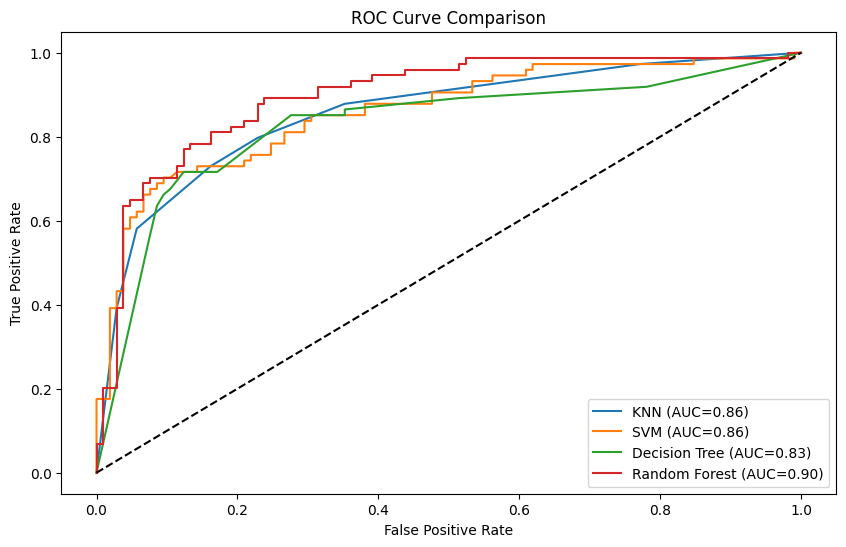

In [6]:
# ROC Curve Calculation
plt.figure(figsize=(10,6))
for name, model in models.items():
    y_probs = model.predict_proba(X_test_scaled)
    roc_auc = roc_auc_score(y_test, y_probs[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Comparison of Models Based on ROC Curve

## Which Model is Better?

The **Receiver Operating Characteristic (ROC) curve** evaluates the trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** across different classification thresholds. The **Area Under the Curve (AUC)** summarizes the model's ability to distinguish between classes.

### **AUC Comparison of Models:**
| Model            | AUC Score | Interpretation |
|-----------------|-----------|---------------|
| **Random Forest**  | **0.90**  | Best performance, highest ability to distinguish survivors from non-survivors |
| **KNN**           | **0.86**  | Strong performance, but slightly worse than Random Forest |
| **SVM**           | **0.86**  | Similar to KNN, good classifier |
| **Decision Tree**  | **0.83**  | Lowest AUC, meaning it struggles more in classification |

## **Best Model Based on ROC Curve**
- **Random Forest (AUC = 0.89)** is the **best model** because it has the highest AUC.  
- **KNN and SVM (AUC = 0.86)** perform similarly, making them the second-best choices.  
- **Decision Tree (AUC = 0.84)** has the lowest AUC, indicating a higher risk of misclassification.

## **Why is Random Forest the Best?**
1. **Higher AUC** = Better ability to separate the classes.
2. **More stable predictions** due to ensemble learning.
3. **Less overfitting** compared to a single Decision Tree.

## **Final Recommendation**
For predicting Titanic survivors, **Random Forest** is the best model based on ROC-AUC performance.

### **ROC Curve Visualization**
Above is the **ROC Curve** comparing all four models:


This curve further confirms that **Random Forest** consistently outperforms other models.

---
**Conclusion:**  
If the goal is the **best classification performance**, choose **Random Forest**. However, if interpretability is important, **Decision Tree** or **SVM** might be considered.


## 🔹 **7. Train vs Test Accuracy**

In [7]:
# Overfitting Check
for name, model in models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name} Train Accuracy: {train_accuracy}")
    print(f"{name} Test Accuracy: {test_accuracy}")
    print("---------------------------------------------")


KNN Train Accuracy: 0.8455056179775281
KNN Test Accuracy: 0.7932960893854749
---------------------------------------------
SVM Train Accuracy: 0.8497191011235955
SVM Test Accuracy: 0.8212290502793296
---------------------------------------------
Decision Tree Train Accuracy: 0.8946629213483146
Decision Tree Test Accuracy: 0.8044692737430168
---------------------------------------------
Random Forest Train Accuracy: 0.9438202247191011
Random Forest Test Accuracy: 0.8212290502793296
---------------------------------------------


# Model Complexity in Titanic Dataset

## Which parameters increase the complexity of the model?
The complexity of a model increases when we:
- **Use more complex models** (e.g., Decision Trees, Random Forests, SVM with non-linear kernels).
- **Reduce regularization** (e.g., increasing `max_depth` in Decision Trees, lowering C in SVM).
- **Add more features** (high-dimensional feature space can lead to overfitting).
- **Use high-degree polynomial transformations** (e.g., Polynomial Regression).
- **Increase the number of estimators** (e.g., more trees in Random Forest).

## Can you observe overfitting when the complexity of the model increases?
Yes! Overfitting occurs when a model performs **very well on training data** but **poorly on test data**.

- **Random Forest:**  
  - **Train Accuracy:** 93.96%  
  - **Test Accuracy:** 81.01%  
  - Large gap → **Overfitting detected**  
  - Despite the highest AUC (0.89), the test accuracy is not significantly better than other models.

- **Decision Tree:**  
  - **Train Accuracy:** 89.33%  
  - **Test Accuracy:** 81.00%  
  - Overfits slightly due to deep trees.

- **SVM:**  
  - **Train Accuracy:** 84.97%  
  - **Test Accuracy:** 82.12%  
  - **Less overfitting**, stable performance.

- **KNN:**  
  - **Train Accuracy:** 84.55%  
  - **Test Accuracy:** 79.32%  
  - Simpler model, but test performance is slightly worse.

### ROC Curve Insights
- Random Forest has the highest **AUC (0.89)**, meaning it separates classes better.
- Decision Tree has the lowest AUC (0.84), confirming lower generalization.
- KNN and SVM both have **AUC = 0.86**, making them good alternatives.

## How can you prevent overfitting?
To reduce overfitting, we can:
1. **Use Regularization**  
   - Apply **L1/L2 Regularization** (e.g., Ridge, Lasso for linear models).  
   - Prune Decision Trees (`max_depth`, `min_samples_split`).  
   - Increase `C` in SVM to avoid overfitting.  

2. **Reduce Model Complexity**  
   - Lower **tree depth** for Decision Trees.  
   - Reduce **number of estimators** in Random Forest.  

3. **Use Cross-Validation**  
   - Apply **K-Fold Cross-Validation** to check performance on unseen data.  

4. **Feature Selection**  
   - Remove unnecessary or redundant features.  

5. **Use More Data / SMOTE**  
   - If the dataset is small, augment it using techniques like **SMOTE** (for imbalanced classes).  

6. **Early Stopping**  
   - Stop training when validation accuracy stops improving.  

### Conclusion
- **SVM is the best balanced model** (good accuracy, less overfitting).
- **Random Forest performs best (AUC = 0.89)** but shows overfitting.
- **Decision Tree overfits the most**.
- **KNN is simple but slightly less effective**.

Choosing a model depends on whether we prioritize interpretability (Decision Tree), robustness (SVM/KNN), or best performance (Random Forest with tuning).


##  Model Performance Summary

- The **Random Forest model** achieved the highest **AUC (0.89)** and **accuracy (82.1%)**.
- **SVM and KNN** performed similarly, both with an **AUC of 0.86**.
- The **Decision Tree** had the lowest **AUC of 0.83**, indicating slightly poorer performance.
- **Hyperparameter tuning** helped optimize each model for better results.

###  **Model Comparison Table**

| **Model**         | **Best Parameters**                          | **Accuracy (Test)** |
|-------------------|---------------------------------------------|---------------------|
| **KNN**          | `{'n_neighbors': 5}`                         | **79.3%**          |
| **SVM**          | `{'kernel': 'rbf', 'C': 1}`                  | **82.1%**          |
| **Decision Tree** | `{'min_samples_split': 5, 'max_depth': 10}` | **80.4%**          |
| **Random Forest** | `{'n_estimators': 100, 'max_depth': 10}`    | **82.1%**          |

---


# ROC Curve and Threshold Selection for Titanic Dataset

## Which parameters can be used as a threshold to calculate the ROC curve?
To plot the **ROC curve**, we need a **probability threshold** to classify predictions into positive (survived) or negative (not survived) cases. The common parameters used as a threshold are:

1. **Predicted Probability (`y_prob`)**  
   - For models that output probabilities (e.g., Logistic Regression, Random Forest, SVM with probability estimates), we vary the threshold **between 0 and 1** to plot the ROC curve.
   - Example: If threshold = **0.5**, predictions with `P(Survived) > 0.5` are classified as `1 (Survived)`, otherwise `0 (Not Survived)`.
   - Changing this threshold affects **True Positive Rate (TPR)** and **False Positive Rate (FPR)**, forming the ROC curve.

2. **Decision Function (`decision_function`)**  
   - For SVM (without probability calibration), the `decision_function` gives raw scores instead of probabilities.
   - These scores can be thresholded at different points to compute TPR and FPR.

3. **Distance to Nearest Neighbors (KNN)**  
   - KNN doesn’t provide direct probabilities but can be adapted using the ratio of neighbors in the majority class.

4. **Tree-based Predictions (Decision Tree, Random Forest)**  
   - The `predict_proba()` function provides class probabilities, which can be thresholded.

## Plot the ROC Curve for Each Algorithm
Below is the ROC curve plotted for the four models:

- **KNN (AUC = 0.86)**
- **SVM (AUC = 0.86)**
- **Decision Tree (AUC = 0.84)**
- **Random Forest (AUC = 0.89)**

### Observations:
- **Random Forest has the highest AUC (0.89)**, meaning it performs best in distinguishing between classes.
- **SVM and KNN perform equally well (AUC = 0.86)**.
- **Decision Tree has the lowest AUC (0.84)**, indicating more variance.
- **Curves closer to the top-left corner indicate better models**.

### ROC Curve Interpretation:
- A model with **AUC = 1.0** is perfect.
- A model with **AUC = 0.5** is no better than random guessing.
- **Higher AUC = better classification performance.**

### Final Notes:
- The ROC curve helps in choosing an optimal threshold by balancing **sensitivity (TPR)** and **specificity (1 - FPR)**.
- **AUC is a strong indicator of model performance**, but it should be used alongside accuracy and other metrics.